# King Country House Price Prediction
Predict the price of King Country House using ML

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("kc_house_data.csv")

# EDA

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

C:\Users\emura\AppData\Local\Temp\ipykernel_26916\1097224613.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


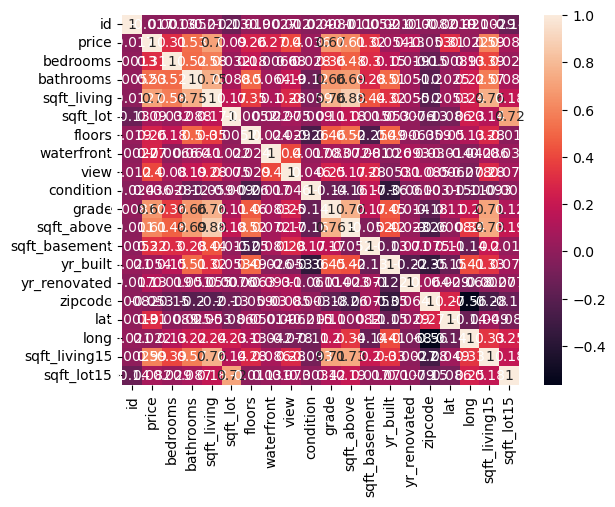

In [34]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True);

In [36]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [37]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

    id: Her ev için benzersiz bir tanımlayıcı.
    date: Evin satıldığı tarih.
    price: Evin satış fiyatı (hedef değişken).
    bedrooms: Evin yatak odası sayısı.
    bathrooms: Evin banyo sayısı. Bu sayı 0.5 olarak artabilir, bu genellikle evde bir tuvaletin olduğu ancak duş veya küvetin olmadığı anlamına gelir.
    sqft_living: Evin yaşam alanının feet kare (ft²) cinsinden büyüklüğü.
    sqft_lot: Evin arsa alanının feet kare (ft²) cinsinden büyüklüğü.
    floors: Evin kat sayısı.
    waterfront: Evin su kenarı olup olmadığını gösteren bir değişken (genellikle bir göl veya deniz kenarı).
    view: Evin manzarasının kalitesini gösteren bir ölçüt.
    condition: Evin genel durumunu gösteren bir ölçüt.
    grade: King County tarafından verilen evin genel yapım kalitesi ve tasarımına ilişkin bir değerlendirme.
    sqft_above: Evin yer seviyesinin üstünde kalan yaşam alanının feet kare (ft²) cinsinden büyüklüğü.
    sqft_basement: Evin bodrum katının feet kare (ft²) cinsinden büyüklüğü.
    yr_built: Evin inşa edildiği yıl.
    yr_renovated: Evin son olarak yenilendiği yıl. Eğer ev hiç yenilenmemişse bu değer 0 olabilir.
    zipcode: Evin bulunduğu posta kodu.
    lat: Evin coğrafi enlemi.
    long: Evin coğrafi boylamı.
    sqft_living15: 2015 yılında evin yaşam alanının feet kare (ft²) cinsinden büyüklüğü (bazı yenilemeler sonucu değişmiş olabilir).
    sqft_lot15: 2015 yılında evin arsa alanının feet kare (ft²) cinsinden büyüklüğü (bazı yenilemeler sonucu değişmiş olabilir).

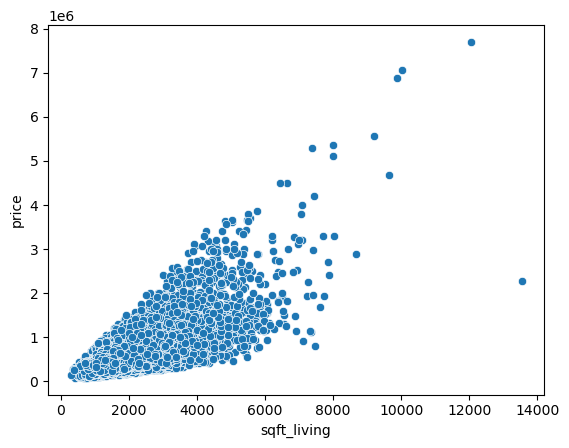

In [38]:
sns.scatterplot(x="sqft_living",y="price",data=df);

<Axes: xlabel='price', ylabel='Count'>

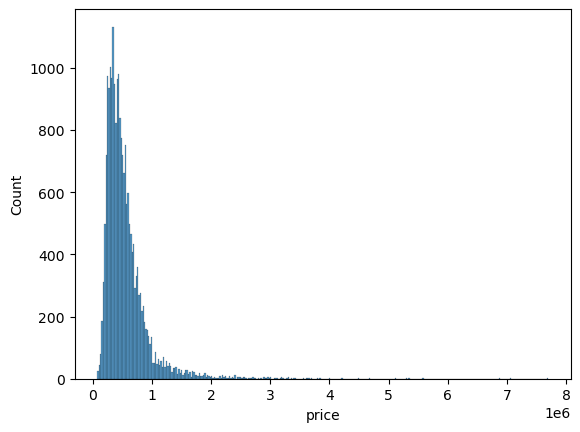

In [39]:
sns.histplot(df.price)

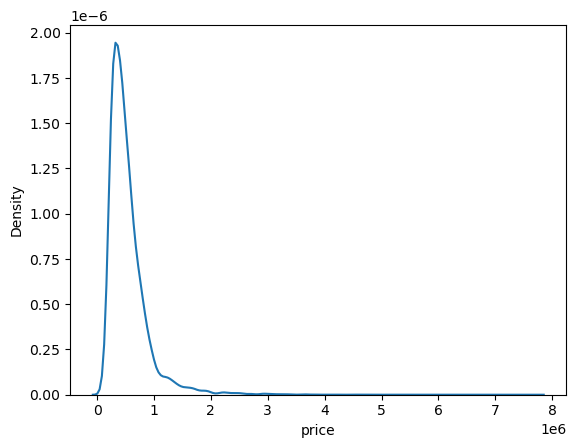

In [11]:
sns.kdeplot(df.price);

# Feature Engineering

In [13]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [15]:
abs(df.corr(numeric_only=True)['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

In [40]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [41]:
current_year = datetime.now().year
df['years_since_renovation'] = df.apply(lambda row: current_year - row['yr_renovated'] if row['yr_renovated'] != 0 else current_year - row['yr_built'], axis=1)
df['age_of_house'] = current_year - df['yr_built']

In [42]:
df = pd.get_dummies(df, columns=['zipcode'], drop_first=True)

In [43]:
df.drop(['id', 'date', 'yr_renovated', 'yr_built'], axis=1, inplace=True)

In [44]:
X = df.drop('price', axis=1)
y = df['price']

In [45]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

In [22]:
#pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.1/99.8 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.1/99.8 MB 731.4 kB/s eta 0:02:17
   ---------------------------------------- 0.2/99.8 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.4/99.8 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.5/99.8 MB 1.8 MB/s eta 0:00:56
   ---------------------------------------- 0.7/99.8 MB 2.1 MB/s eta 0:00:47
   ---------------------------------------- 0.7/99.8 MB 2.1 MB/s eta 0:00:47
   ---------------------------------------- 0.7/99.8 MB 2.1 MB/s eta 0:00:47
   ---------------------------------------- 1.2/99.8 MB 2.5 MB/s eta 0:00:39
   ---------------------------------------- 1.2/99.8 MB 2.4 MB/s eta 0:00:42
 

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [24]:
#pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 1.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.3 MB 871.5 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.3 MB 944.1 kB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.3 MB 1.4 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.3 MB 1.4 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.3 MB 1.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.3 MB 1.8 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.3 MB 2.1 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 1.8 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.3 MB 2.4 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 2.6 MB/s eta 0:00:01
   ----------

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [12]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# defined Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}

In [59]:
# defined Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

results = {}
for name, model in models.items():
    # Modeli eğitme
    model.fit(X_train, y_train)
    # Test seti üzerinde tahmin yapma
    predictions = model.predict(X_test)
    # MSE ve R^2 değerlerini hesaplama
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)  # MSE'nin karekökünü alarak RMSE hesaplama
    r2 = r2_score(y_test, predictions)
    # Sonuçları saklama
    results[name] = (mse, rmse, r2)

# Sonuçları yazdırma
for name, (mse, rmse, r2) in results.items():
    print(f"{name}: Average RMSE: {rmse:.2f}")
    print(f"{name}: R2: {r2:.2f}")

# En iyi modeli bulma (En düşük MSE'ye göre)
best_model_name = min(results, key=lambda x: results[x][0])
best_model_mse, best_model_rmse, best_model_r2 = results[best_model_name]

print(f"\nBest Performing Model: {best_model_name} with Average RMSE: {best_model_rmse:.2f} and R2: {best_model_r2:.2f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2505
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 89
[LightGBM] [Info] Start training from score 537768.047947
Linear Regression: Average RMSE: 170385.71
Linear Regression: R2: 0.81
Decision Tree: Average RMSE: 207503.55
Decision Tree: R2: 0.72
Random Forest: Average RMSE: 147879.57
Random Forest: R2: 0.86
Gradient Boosting: Average RMSE: 142594.11
Gradient Boosting: R2: 0.87
XGBoost: Average RMSE: 141796.66
XGBoost: R2: 0.87
LightGBM: Average RMSE: 131987.97
LightGBM: R2: 0.88

Best Performing Model: LightGBM with Average RMSE: 131987.97 and R2: 0.88


In [60]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

results = {}
for name, model in models.items():
    # Modeli eğitme
    model.fit(X_train, y_train)
    # Test seti üzerinde tahmin yapma
    predictions = model.predict(X_test)
    # MSE ve R^2 değerlerini hesaplama
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)  # MSE'nin karekökünü alarak RMSE hesaplama
    r2 = r2_score(y_test, predictions)
    # Sonuçları saklama
    results[name] = (mse, rmse, r2)

# Sonuçları yazdırma
for name, (mse, rmse, r2) in results.items():
    print(f"{name}: Average RMSE: {rmse:.2f}")
    print(f"{name}: R2: {r2:.2f}")

# En iyi modeli bulma (En düşük MSE'ye göre)
best_model_name = min(results, key=lambda x: results[x][0])
best_model_mse, best_model_rmse, best_model_r2 = results[best_model_name]

print(f"\nBest Performing Model: {best_model_name} with Average RMSE: {best_model_rmse:.2f} and R2: {best_model_r2:.2f}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.142e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


Linear Regression: Average RMSE: 170385.71
Linear Regression: R2: 0.81
Decision Tree: Average RMSE: 208144.16
Decision Tree: R2: 0.71
Ridge: Average RMSE: 170529.06
Ridge: R2: 0.81
Lasso: Average RMSE: 170380.65
Lasso: R2: 0.81
ElasticNet: Average RMSE: 239421.02
ElasticNet: R2: 0.62

Best Performing Model: Lasso with Average RMSE: 170380.65 and R2: 0.81


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.523e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV ile model seçimi ve hiperparametre ayarlama+
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (MSE): {-grid_search.best_score_}")

In [ ]:
#remove outline values
